In [85]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [71]:
from keras.models import Sequential
from keras.layers import Dense

In [72]:
df = pd.read_csv('./diabetes.csv') 
print(df.shape)
df.describe()

(768, 9)


,pregnant-times,glucose-concentr,blood-pressure,skin-thickness,insulin,mass-index,pedigree-func,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [73]:
target_column = ['class'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,pregnant-times,glucose-concentr,blood-pressure,skin-thickness,insulin,mass-index,pedigree-func,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.194990,0.410381
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.136913,0.145188
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032231,0.259259
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.100723,0.296296
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.153926,0.358025
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.258781,0.506173
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [136]:
X = df[predictors].values
y = df[target_column].values

In [139]:
y = pd.get_dummies(y.flatten()).to_numpy()
#y_test = pd.get_dummies(y_test.flatten()).to_numpy()

# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test.factorize()[0])

count_classes = y_test.shape[1]
print(count_classes)


2


In [148]:
model = Sequential()
model.add(Dense(6, activation='relu', input_dim=8))
model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X, y, validation_split = 0.3, epochs=500, batch_size=32)

Epoch 1/500
17/17 [==============================] - 1s 10ms/step - loss: 0.7099 - accuracy: 0.3538 - val_loss: 0.7038 - val_accuracy: 0.3636
Epoch 2/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6985 - accuracy: 0.4097 - val_loss: 0.6935 - val_accuracy: 0.4372
Epoch 3/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6886 - accuracy: 0.5698 - val_loss: 0.6857 - val_accuracy: 0.6883
Epoch 4/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6814 - accuracy: 0.6685 - val_loss: 0.6787 - val_accuracy: 0.6753
Epoch 5/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.6480 - val_loss: 0.6744 - val_accuracy: 0.6580
Epoch 6/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6733 - accuracy: 0.6480 - val_loss: 0.6709 - val_accuracy: 0.6580
Epoch 7/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6707 - accuracy: 0.6480 - val_loss: 0.6681 - val_accuracy: 0.6580
Epoch 8/500


In [149]:
pred_test= model.predict(X)
scores2 = model.evaluate(X, y, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    
confusion_matrix(y.argmax(axis=1), pred_test.argmax(axis=1))

24/24 [==============================] - 0s 887us/step
Accuracy on test data: 0.7942708134651184% 
 Error on test data: 0.2057291865348816


array([[454,  46],
       [112, 156]])

In [142]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

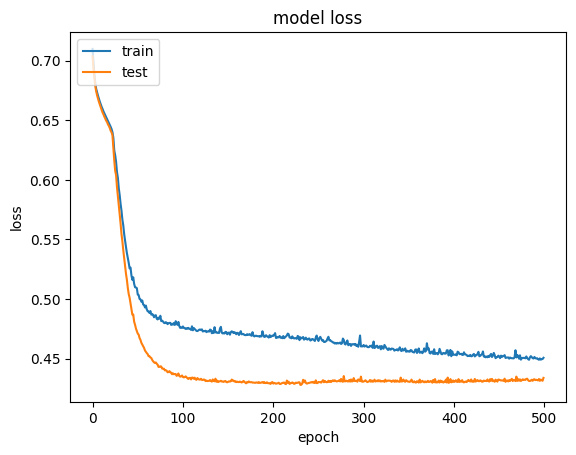

In [150]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()

Błąd na danych walidacyjnych rośnie, podczas gdy błąd na danych treningowych maleje - mamy do czynienie z przeuczeniem.

W tym przypadku błąd danych walidacyjnych jest mniejszy niż błąd danych treningowych - mamy do czynienia z niedouczeniem.

In [151]:
model = Sequential()
model.add(Dense(6, activation='sigmoid', input_dim=8))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X, y, validation_split = 0.3, epochs=500, batch_size=32)

Epoch 1/500
17/17 [==============================] - 0s 11ms/step - loss: 1.0076 - accuracy: 0.3520 - val_loss: 0.9558 - val_accuracy: 0.3420
Epoch 2/500
17/17 [==============================] - 0s 3ms/step - loss: 0.9033 - accuracy: 0.3520 - val_loss: 0.8649 - val_accuracy: 0.3420
Epoch 3/500
17/17 [==============================] - 0s 3ms/step - loss: 0.8273 - accuracy: 0.3520 - val_loss: 0.8000 - val_accuracy: 0.3420
Epoch 4/500
17/17 [==============================] - 0s 3ms/step - loss: 0.7734 - accuracy: 0.3520 - val_loss: 0.7533 - val_accuracy: 0.3420
Epoch 5/500
17/17 [==============================] - 0s 2ms/step - loss: 0.7353 - accuracy: 0.3520 - val_loss: 0.7203 - val_accuracy: 0.3420
Epoch 6/500
17/17 [==============================] - 0s 3ms/step - loss: 0.7085 - accuracy: 0.3520 - val_loss: 0.6975 - val_accuracy: 0.3420
Epoch 7/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.5568 - val_loss: 0.6813 - val_accuracy: 0.6580
Epoch 8/500


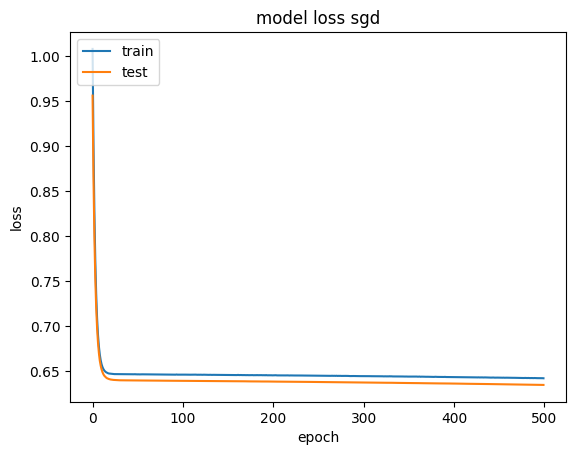

In [152]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss sgd')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [153]:
model = Sequential()
model.add(Dense(6, activation='selu', input_dim=8))
model.add(Dense(3, activation='selu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adadelta', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X, y, validation_split = 0.3, epochs=500, batch_size=32)

Epoch 1/500
17/17 [==============================] - 1s 10ms/step - loss: 0.7588 - accuracy: 0.3464 - val_loss: 0.7613 - val_accuracy: 0.3593
Epoch 2/500
17/17 [==============================] - 0s 3ms/step - loss: 0.7587 - accuracy: 0.3464 - val_loss: 0.7611 - val_accuracy: 0.3593
Epoch 3/500
17/17 [==============================] - 0s 3ms/step - loss: 0.7586 - accuracy: 0.3464 - val_loss: 0.7610 - val_accuracy: 0.3593
Epoch 4/500
17/17 [==============================] - 0s 3ms/step - loss: 0.7584 - accuracy: 0.3464 - val_loss: 0.7609 - val_accuracy: 0.3593
Epoch 5/500
17/17 [==============================] - 0s 3ms/step - loss: 0.7583 - accuracy: 0.3426 - val_loss: 0.7608 - val_accuracy: 0.3593
Epoch 6/500
17/17 [==============================] - 0s 3ms/step - loss: 0.7582 - accuracy: 0.3426 - val_loss: 0.7606 - val_accuracy: 0.3593
Epoch 7/500
17/17 [==============================] - 0s 4ms/step - loss: 0.7581 - accuracy: 0.3426 - val_loss: 0.7605 - val_accuracy: 0.3593
Epoch 8/500


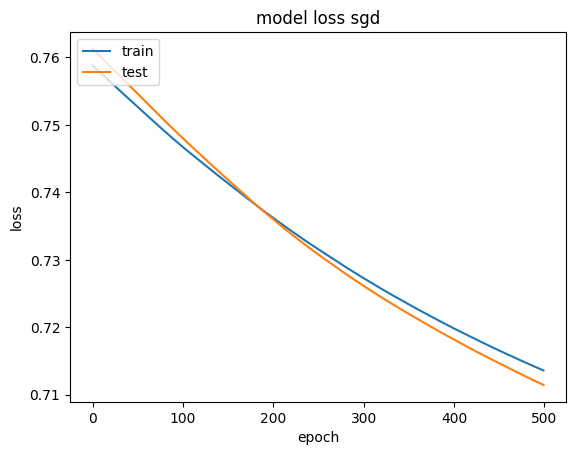

In [154]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss adadelta')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()